<a href="https://colab.research.google.com/github/PurdueCho/Colab/blob/master/g_12_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EC%99%80%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

선형모델
==
다루는 내용
--
- 머신러닝 개념
- 경사하강법
- 선형회귀, 회귀직선
- 선형분류, 분류경계
- 컨퓨전 매트릭스, 분류성능,ROC, AUC

## 실습 데이터 생성

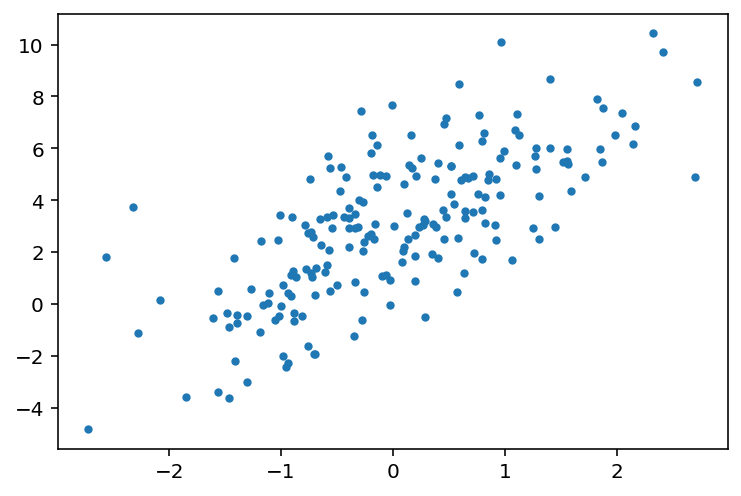

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 
y = w*x + b + np.random.randn(n_samples)*2
plt.scatter(x,y, s=10)

## 선형회귀 모델 사용

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1,1), y)

print(model.coef_)
print(model.intercept_)

[1.97196682]
2.990877399634782


## 회귀직선

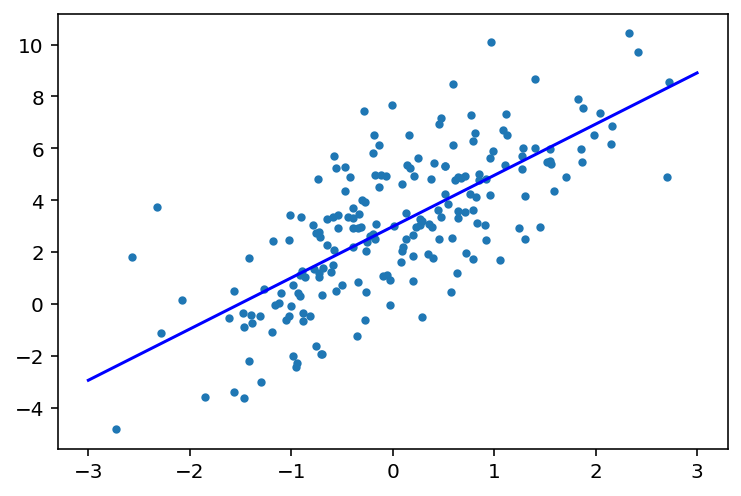

In [8]:
a, b = model.coef_, model.intercept_
xs = np.linspace(-3, 3, 10)
plt.plot(xs, a*xs + b, "b")   # 기울기가 a 절편이 b 인 직선
plt.scatter(x,y, s=10)

## 남여 키-몸무게-성별 예측

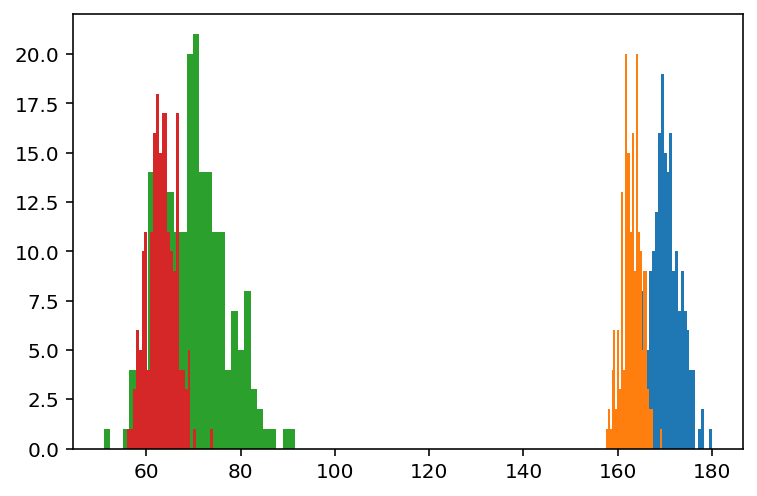

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 200
x1 = 3*np.random.randn(n_samples) + 170        # 키
x2 = 2*np.random.randn(n_samples) + 163

y1 = 2*x1 - 270 + 3*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + 2*np.random.randn(n_samples) # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

In [10]:
# 남자 데이터만 사용하여 키로부터 몸무게 예측
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)    # 훈련 데이터와 테스트 데이터를 랜덤하게 나눠줌 defalut = 75% : 25% shuffling
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

# R-square 점수
leg1.score(X_test.reshape(-1,1), y_test)

0.7761098705783546

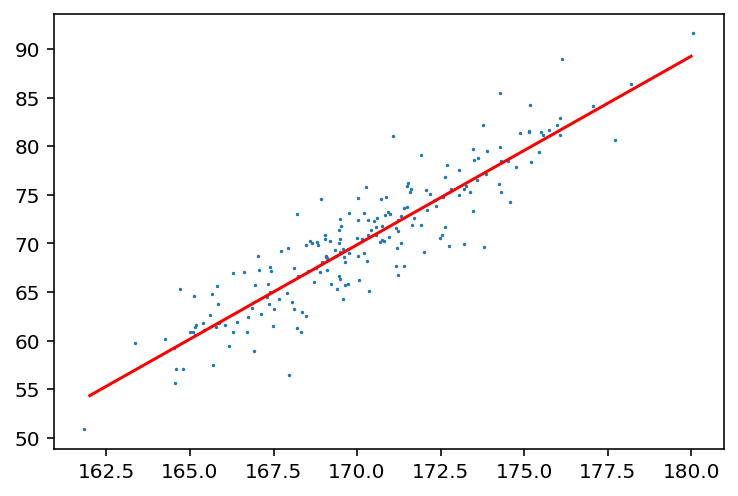

In [11]:
xs = np.linspace(162,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

## 남여 데이터를 합친 데이터 (400명)

In [12]:
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)
leg1.score(X_test.reshape(-1,1), y_test)

0.745659780237963

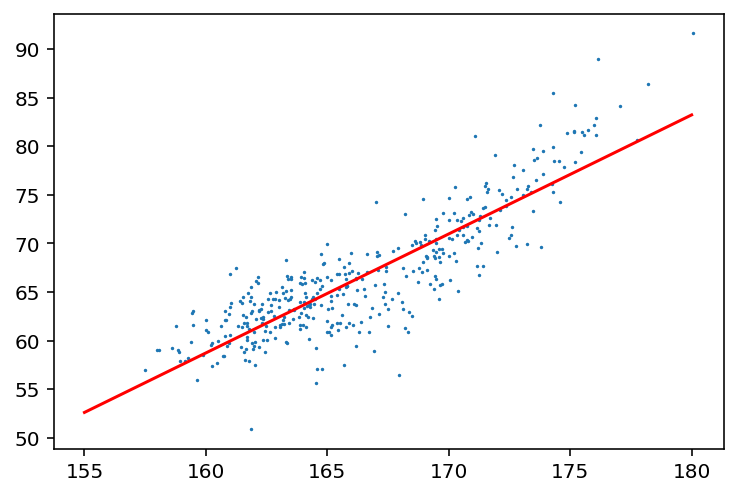

In [13]:
xs = np.linspace(155,180,3)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

In [14]:
# 남성을 0으로 여성을 1로 인코딩
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)
X.tail()

,height,sex
395,165.394231,1
396,159.619224,1
397,162.763311,1
398,161.928932,1
399,161.742840,1


In [15]:
np.random.seed(99)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)
leg.score(X_test, y_test)

0.8416042750329946

## 성별을 고려하여 성능이 개선됨

In [16]:
print(leg.coef_)    # 키의 계수 , 성별의 계수
print(leg.intercept_)

[1.65670531 5.08119604]
-211.76388582156358


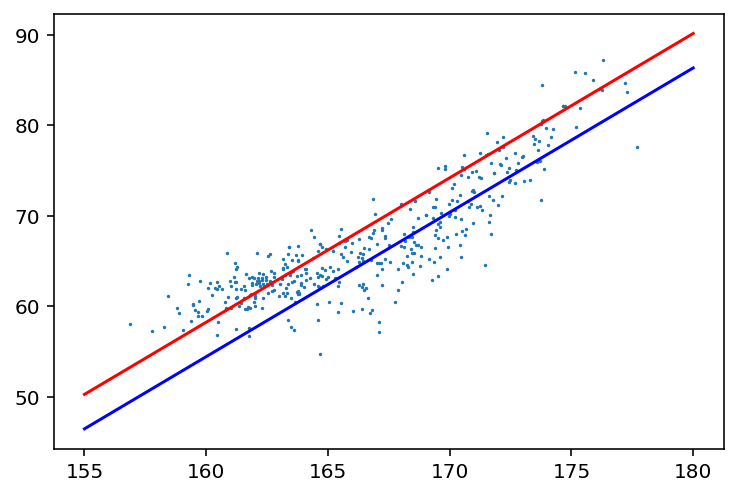

In [55]:
xs = np.linspace(155,180,3)
plt.scatter(x,y, s=0.5)
ys = xs * leg.coef_[0] + leg.coef_[1]*0 + leg.intercept_  # 남
plt.plot(xs, ys, c='b') 
ys = xs * leg.coef_[0] + leg.coef_[1]*1 + leg.intercept_  # 여
plt.plot(xs, ys, c='r')

# 선형 분류

In [17]:
X["weight"] = y
X[:10]

,height,sex,weight
0,170.606331,0,72.631617
1,168.212069,0,73.043877
2,167.140639,0,62.742462
3,170.677599,0,70.167929
4,168.060273,0,64.011809
5,169.587757,0,64.268183
6,175.572622,0,81.140039
7,168.900348,0,67.099512
8,175.440892,0,79.446419
9,173.369873,0,75.341839


In [18]:
y = X["sex"] ;y[:5]

0    0
1    0
2    0
3    0
4    0
Name: sex, dtype: int64

In [19]:
X = X.drop(["sex"], axis=1, errors='ignore');X[:5]

,height,weight
0,170.606331,72.631617
1,168.212069,73.043877
2,167.140639,62.742462
3,170.677599,70.167929
4,168.060273,64.011809


In [20]:
# SD NORMALIZE
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()           
X_sc = sc.fit_transform(X)      # scaling 
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2)
clf = SGDClassifier()           # Linear 분류기 
clf.fit(X_train, y_train)
clf.score(X_test, y_test)       # defalut : accuracy 

0.9375

In [21]:
X_sc[:10]

array([[ 0.90437196,  0.92421376],
       [ 0.37255099,  0.98909309],
       [ 0.13456168, -0.63208783],
       [ 0.9202023 ,  0.53649199],
       [ 0.33883359, -0.43232495],
       [ 0.67812323, -0.39197807],
       [ 2.00750019,  2.26322312],
       [ 0.52543372,  0.05360112],
       [ 1.97823981,  1.99669046],
       [ 1.51821863,  1.3507338 ]])

In [27]:
y_pred = clf.predict(X_test)    # 테스트 데이터 확인
y_pred[:10], y_test[:10]

(array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0]), 213    1
 278    1
 56     0
 334    1
 214    1
 303    1
 8      0
 208    1
 100    0
 17     0
 Name: sex, dtype: int64)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

In [32]:
confusion_matrix(y_test, y_pred)    # confusion matrix

array([[44,  1],
       [ 4, 31]])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       0.97      0.89      0.93        35

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.94        80
weighted avg       0.94      0.94      0.94        80



In [0]:
a1, a2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_    # a1, a2, b 계수

In [0]:
m1, m2 = sc.mean_[0], sc.mean_[1]         #
s1, s2 = sc.scale_[0], sc.scale_[1]       # 

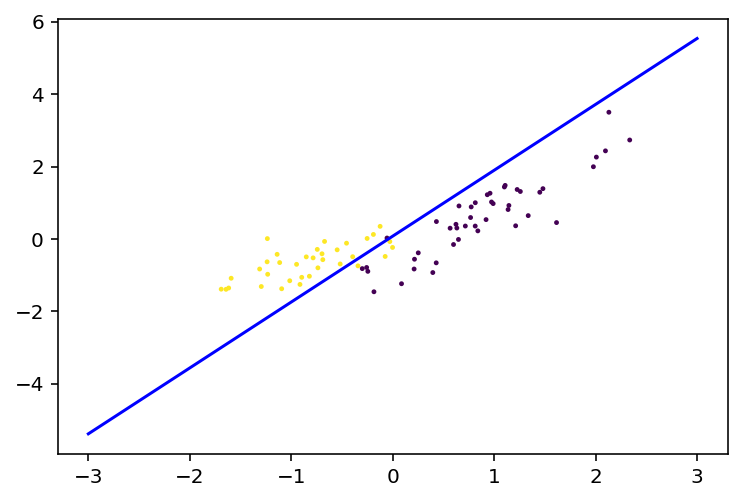

In [38]:
xs = np.linspace(-3,3,3)
plt.scatter(X_test[:,0],X_test[:,1], s=2, c=y_test)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs, ys, c='b')

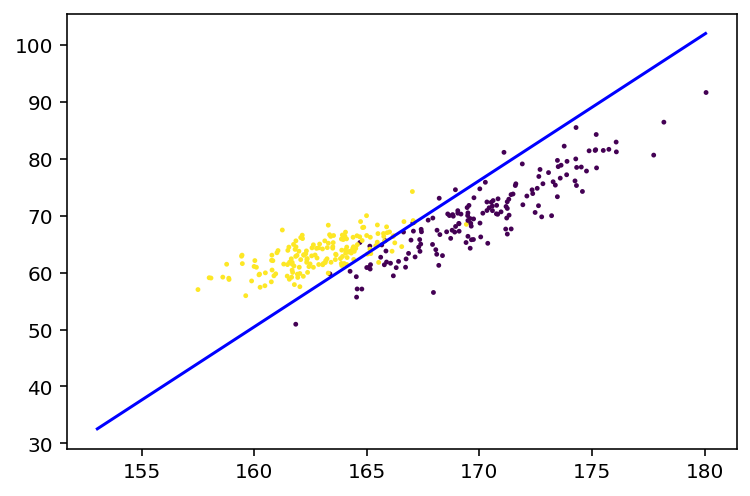

In [39]:
xs = np.linspace(-3,3,3)
plt.scatter(X_train[:,0]*s1+m1,X_train[:,1]*s2+m2, s=2, c=y_train)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs*s1+m1, ys*s2+m2, c='b')

In [43]:
scores = clf.decision_function(X_test)  # ROC 커브를 그리기 위한 score 순서
scores[:10]

array([  2.80798967,  -2.20112545,  -3.24508641,   2.76305768,
         3.54503575,  -0.69158572, -12.00592497,   2.35775428,
        -8.55718986,  -2.83477484])

In [0]:
# ROC 커브
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, scores)
roc_auc = auc(fpr, tpr)

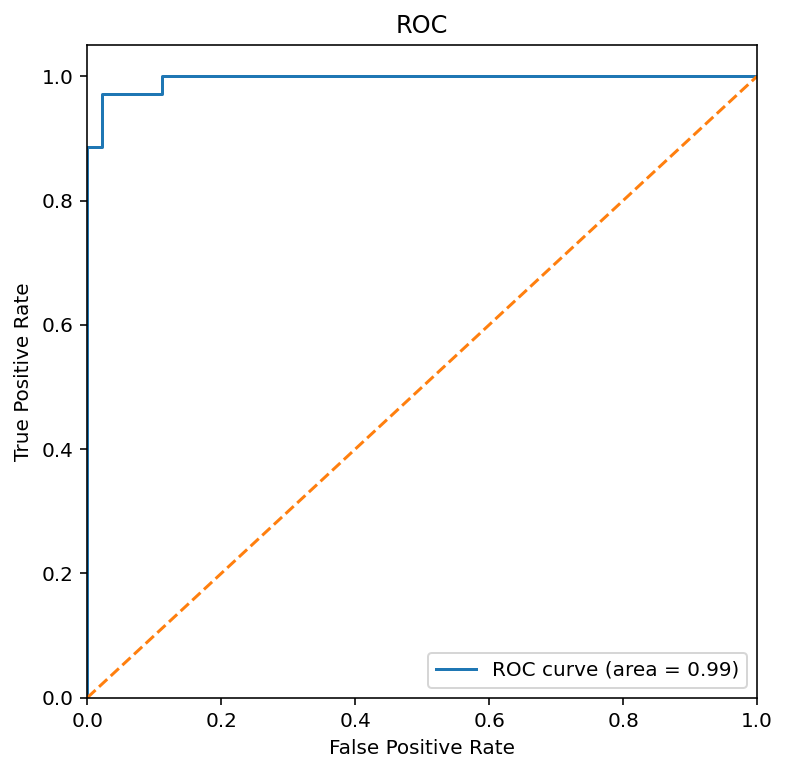

In [45]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

## (참고) 랜덤 포레스트를 사용하는 경우

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.975

## (참고) ROC 성능 비교

In [47]:
# 평가 점수 score 임의로 20명을 배정, 랭킹 평가
y_score = np.linspace(99, 60, 20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


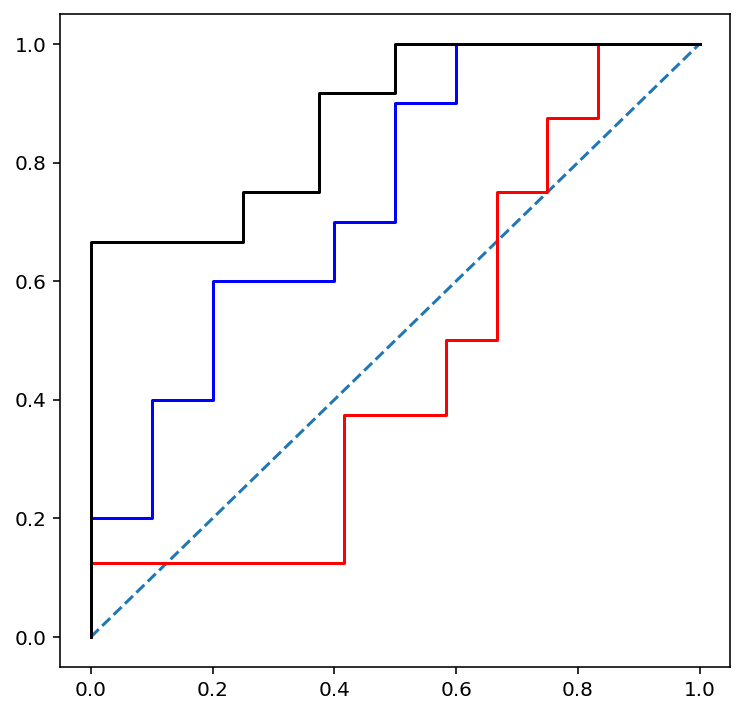

In [48]:
y_real=[[1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0],
        [1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0]]

plt.figure(figsize=(6,6))    
fpr = dict()
tpr = dict()
plt.plot([0, 1], [0, 1], linestyle='--')

my_color = ['r', 'b', 'k']
for i in range(3):
    fpr, tpr, _ = roc_curve(y_real[i], y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, c=my_color[i])